## Import the Required Libraries

In [ ]:
import cv2
import np_utils

In [ ]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
%matplotlib inline
import tensorflow as tf
import tensorflow.keras
import glob
import cv2
import pickle, datetime

from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.layers import LSTM, Input, TimeDistributed,Convolution2D,Activation
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras.layers import BatchNormalization
#from tensorflow.keras import np_utils
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model

from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
pwd


## Converting tiff images to jpg

In [ ]:
#base_path = SMALL_IMG_DATA_DIR + '/' + '04_LYMPHO' + '/'
base_path = '/'+'DATA'+'/' + '/' + '04_LYMPHO' + '/'
newpath = os.getcwd() + '/' + 'processed_data' + '/' + '04_LYMPHO'

In [ ]:
newpath

In [ ]:
read = cv2.imread(base_path + 'E29A_CRC-Prim-HE-05_003.tif_Row_151_Col_2101.tif')

In [ ]:
outfile = 'E29A_CRC-Prim-HE-05_003.tif_Row_151_Col_2101.tif'.split('.')[0] + '.jpg'

In [ ]:
plt.imshow(read)

Here we will dfine a function to convert tiff images to jpg

In [50]:
DATA_DIR = 'home/ruchikas/Projects/histopathology_image_classification/' #in my google drive i have placed the data in histopathology folder
SMALL_IMG_DATA_DIR = os.path.join(os.getcwd(), 'DATA') #joining the path with where the data is

In [51]:
os.listdir(SMALL_IMG_DATA_DIR)

['08_EMPTY',
 '07_ADIPOSE',
 '01_TUMOR',
 '05_DEBRIS',
 '06_MUCOSA',
 '02_STROMA',
 '04_LYMPHO',
 '03_COMPLEX']

In [52]:
def tiff_to_jpg(class_name):
    base_path = SMALL_IMG_DATA_DIR + '/' + class_name + '/'
    newpath = os.getcwd() + '/' + 'processed_data' + '/' + class_name
    if not os.path.exists(newpath):
        os.makedirs(newpath)
    for infile in os.listdir(base_path):
        print ("file : " + infile)
        read = cv2.imread(base_path + infile)
        outfile = infile.split('.')[0] + '.jpg'
        cv2.imwrite(newpath + '/' + outfile, read, [int(cv2.IMWRITE_JPEG_QUALITY), 200])

In [53]:
#load each of the class data, convert them to jpg and save them
#tiff_to_jpg("04_LYMPHO")
tiff_to_jpg("02_STROMA")
tiff_to_jpg("07_ADIPOSE")
tiff_to_jpg("01_TUMOR")
tiff_to_jpg("06_MUCOSA")
tiff_to_jpg("05_DEBRIS")
tiff_to_jpg("08_EMPTY")
tiff_to_jpg("03_COMPLEX")

file : 119D8_CRC-Prim-HE-03_016.tif_Row_1051_Col_451.tif
file : 12D7B_CRC-Prim-HE-01_019.tif_Row_451_Col_1.tif
file : 148B5_CRC-Prim-HE-04.tif_Row_151_Col_1201.tif
file : 12034_CRC-Prim-HE-03_008.tif_Row_601_Col_301.tif
file : 102E8_CRC-Prim-HE-05_009b.tif_Row_151_Col_751.tif
file : 12A26_CRC-Prim-HE-10_019.tif_Row_1_Col_1651.tif
file : 11D89_CRC-Prim-HE-04.tif_Row_751_Col_2701.tif
file : 13AAD_CRC-Prim-HE-02_015.tif_Row_301_Col_1051.tif
file : 110B8_CRC-Prim-HE-08_004.tif_Row_301_Col_1.tif
file : 1370D_CRC-Prim-HE-01_050.tif_Row_901_Col_151.tif
file : 10D4B_CRC-Prim-HE-10_019.tif_Row_901_Col_1351.tif
file : 147B1_CRC-Prim-HE-04_007.tif_Row_451_Col_451.tif
file : 116FF_CRC-Prim-HE-03_023.tif_Row_451_Col_151.tif
file : 10546_CRC-Prim-HE-03.tif_Row_1351_Col_1351.tif
file : 12EE6_CRC-Prim-HE-08_018.tif_Row_151_Col_151.tif
file : 13BCC_CRC-Prim-HE-09.tif_Row_451_Col_151.tif
file : 1365F_CRC-Prim-HE-06_003.tif_Row_301_Col_1051.tif
file : 132B1_CRC-Prim-HE-04.tif_Row_1801_Col_751.tif
file : 

Splitting the data into train, test and Val folders

1. To automatically split the entired data into train, test and val, install **split_folders**.
2. Provide the path to the folder where the data is located.
3. Provide the path where you want the data to be after the split.
4. Provide the ratio of split as an arguement.

In [54]:
# #install the library
#!pip install split_folders

In [94]:
#

NameError: name 'path_to_zip_file' is not defined

In [ ]:
os.getcwd()

In [95]:
import splitfolders # or import splitfolders
input_folder = os.getcwd() + '/' + 'processed_data' + '/' #path to where your data is
output = os.getcwd() + '/' + 'split_data' #where you want the split datasets saved. one will be created if it does not exist or none is set

splitfolders.ratio(input_folder, output = output, seed = 42, ratio = (.7, .3, .0)) # provide the ration of split (train, val, test)

Copying files: 4431 files [00:00, 8545.04 files/s]


Loading training data and representing it as numpy array

1. The following function will load all the training images from thd train folder.
2. Store the images in an empty list.
3. Store the corresponding labels in an empty list.
4. Convert the list to numpy arrays.

In [ ]:
import glob

In [101]:
train_images = [] # store the training images
train_labels = [] # store the corresponding labels

#provide path the train folder
for directory_path in glob.glob(os.getcwd() + '/' + 'split_data' + '/' + 'train' + '/*'):
    train_label = directory_path.split("/")[-1] #extract the labels
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (150, 150))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(train_label)
train_images = np.array(train_images) #convert the list to numpy array
train_labels = np.array(train_labels) #convert the list to numpy array

In [102]:
train_images.shape

(3098, 150, 150, 3)

## Creating a dataframe using sample data (Your request)

Here I am creating a pandas dataframe for the image data, with two columns. I am gonna take a subset of the data to create this dataframe column 1 - Array of images column 2 - Class labels

In [103]:
#take the sample images from the array
sample_train_imgs = train_images[0:20] #select 
#take the corresponding labels for the sample images
sample_train_labels = train_labels[0:20]

In [104]:
#creating a dataframe using the sample images and labels
sample_dataset = pd.DataFrame({'Images': list(sample_train_imgs), 'Labels': sample_train_labels})

In [105]:
#checking the dataframe
sample_dataset.head()

,Images,Labels
0,"[[[243, 245, 244], [243, 245, 244], [244, 244,...",08_EMPTY
1,"[[[245, 245, 247], [245, 245, 247], [244, 244,...",08_EMPTY
2,"[[[242, 244, 243], [241, 243, 242], [241, 243,...",08_EMPTY
3,"[[[244, 246, 245], [244, 246, 245], [243, 245,...",08_EMPTY
4,"[[[241, 241, 241], [241, 241, 241], [240, 240,...",08_EMPTY


Text(0.5, 1.0, '08_EMPTY')

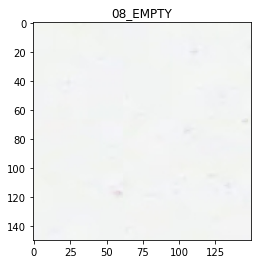

In [106]:
#plotting the images using the dataframe
plt.imshow(sample_dataset['Images'][5])
plt.title(sample_dataset['Labels'][5])

Creating a mapping dictionery

The following mapping will help to identify the class label the id belong to and vice-versa

In [107]:
# map class label to ids
label_to_id = {v:i for i, v in enumerate(np.unique(train_labels))}

#reverse mapping ids to class label
id_to_label = {v: k for k, v in label_to_id.items()}
train_label_ids = np.array([label_to_id[x] for x in train_labels])

In [108]:
#checking the size of the data
train_images.shape, train_label_ids.shape, train_labels.shape

((3098, 150, 150, 3), (3098,), (3098,))

Loading testing data

1. The following function will load all the testing images from the val folder.
2. Store the images in an empty list.
3. Store the corresponding labels in an empty list.
4. Convert the list to numpy arrays.

In [123]:
test_images = [] #store the test images
test_labels = [] #store the corresponding test labels

#provide path to the val data
for directory_path in glob.glob(os.getcwd() + '/' + 'split_data' + '/' + 'val' + '/*'):
    test_label = directory_path.split("/")[-1] #extract the labels
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (150, 150))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(test_label)
test_images = np.array(test_images) #convert the list to numpy array
test_labels = np.array(test_labels) #convert the list to numpy array

In [124]:
# get the test label ids
test_label_ids = np.array([label_to_id[x] for x in test_labels])

In [125]:
#checking the test data
test_images.shape, test_label_ids.shape

((1326, 150, 150, 3), (1326,))

Getting train and test data

Assigning values to train and test

In [126]:
x_train, y_train, x_test, y_test, num_cat = train_images, train_labels, test_images, test_labels, len(label_to_id)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape, num_cat)

(3098, 150, 150, 3) (3098,) (1326, 150, 150, 3) (1326,) 8


Normalizing the data

In [127]:
#Normalization of the images so that pixel values are in range 0-1
X_norm_train = np.array(x_train / 255.0)
X_norm_test = np.array(x_test / 255.0)


## Label Encoding
num_classes = num_cat #num of classes
leLabel = LabelEncoder() #instantiate the LabelEncoder object
y_train_enc = leLabel.fit_transform(y_train) #fit to y train
y_test_enc = leLabel.fit_transform(y_test) # fit to y test
y_train_new = to_categorical(num_classes = num_classes, y = y_train_enc) #converting to categorical
y_test_new = to_categorical(num_classes = num_classes, y = y_test_enc)

In [138]:
X_norm_test.shape, y_test_new.shape, y_train_new.shape, X_norm_train.shape

((1326, 150, 150, 3), (1326, 8), (3098, 8), (3098, 150, 150, 3))

In [128]:
from tensorflow.keras.layers import MaxPool2D

Custom CNN

The first step is to build a custom CNN and train the model on the pre-processed data so that later on we can extract the features to be fed to a machine learning model

In [139]:
#building a sequential model
model = Sequential()

#can play around with number of filters and kernel size
model.add(Conv2D(filters = 128, kernel_size = (5,5),padding = 'same', activation ='relu', input_shape = (150,150,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256,activation = "relu"))          
model.add(Dense(64,activation = "relu"))
model.add(Dense(32,activation = "relu"))

model.add(Dense(num_cat, activation = "softmax"))

In [140]:
#compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = "Adam", metrics = ['accuracy'])

In [141]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 150, 150, 128)     9728      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 128)       0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 75, 75, 64)        73792     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 37, 37, 64)       

No Data Augmentation

Here, we are going to train the model without applying any data augmenation on the data to see how the model performs

In [142]:
#fit the model on the data
custom_cnn_hist = model.fit(X_norm_train, y_train_new, 
                       batch_size = 64, epochs = 15, 
                       verbose = 1, 
                       validation_data = (X_norm_test, y_test_new))

Epoch 1/15
49/49 [==============================] - 70s 1s/step - loss: 1.6457 - accuracy: 0.2899 - val_loss: 1.4413 - val_accuracy: 0.3205
Epoch 2/15
49/49 [==============================] - 69s 1s/step - loss: 1.3459 - accuracy: 0.3890 - val_loss: 1.3514 - val_accuracy: 0.3650
Epoch 3/15
49/49 [==============================] - 68s 1s/step - loss: 1.1539 - accuracy: 0.5065 - val_loss: 0.9550 - val_accuracy: 0.6018
Epoch 4/15
49/49 [==============================] - 69s 1s/step - loss: 0.8969 - accuracy: 0.6233 - val_loss: 1.0214 - val_accuracy: 0.5151
Epoch 5/15
49/49 [==============================] - 69s 1s/step - loss: 0.8045 - accuracy: 0.6591 - val_loss: 0.7938 - val_accuracy: 0.6810
Epoch 6/15
49/49 [==============================] - 69s 1s/step - loss: 0.8284 - accuracy: 0.6607 - val_loss: 0.8162 - val_accuracy: 0.6327
Epoch 7/15
49/49 [==============================] - 69s 1s/step - loss: 0.8607 - accuracy: 0.6304 - val_loss: 0.7762 - val_accuracy: 0.6953
Epoch 8/15
49/49 [==

With Data Augmentation

Here, we are going to train the model by applying data augmentation on the data

In [63]:
#applying data aug. such as rotation, zoom, change in height etc.
datagen = ImageDataGenerator(rotation_range = 0.5, 
                             zoom_range = 0.5, 
                             width_shift_range = 0.5,  
                             height_shift_range = 0.5, 
                             horizontal_flip = True, 
                             vertical_flip = True)

datagen.fit(X_norm_train)

In [64]:
custom_cnn_hist_datagen = model.fit_generator(datagen.flow(X_norm_train, y_train_new, batch_size = 64), 
                                              epochs=20,
                                              validation_data=(X_norm_test, y_test_new))

/usr/share/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
49/49 [==============================] - 66s 1s/step - loss: 0.8276 - accuracy: 0.7195
Epoch 2/20
49/49 [==============================] - 66s 1s/step - loss: 0.6735 - accuracy: 0.7411
Epoch 3/20
49/49 [==============================] - 66s 1s/step - loss: 0.6495 - accuracy: 0.7447
Epoch 4/20
49/49 [==============================] - 66s 1s/step - loss: 0.6451 - accuracy: 0.7560
Epoch 5/20
49/49 [==============================] - 66s 1s/step - loss: 0.6265 - accuracy: 0.7669
Epoch 6/20
49/49 [==============================] - 66s 1s/step - loss: 0.6464 - accuracy: 0.7628
Epoch 7/20
49/49 [==============================] - 66s 1s/step - loss: 0.5674 - accuracy: 0.7879
Epoch 8/20
49/49 [==============================] - 66s 1s/step - loss: 0.5848 - accuracy: 0.7815
Epoch 9/20
49/49 [==============================] - 65s 1s/step - loss: 0.5763 - accuracy: 0.7863
Epoch 10/20
49/49 [==============================] - 66s 1s/step - loss: 0.6220 - accuracy: 0.7589
Epoch 11/20
49/49 [

## Saving the model

This block of code you can use to save the trained model in h5 format and later load the saved model to make new predictions

In [ ]:
# #saving hte trained model
# model.save('alexnet_model.h5')  # creates a HDF5 file 'alexnet_model.h5'

# # loading the saved model
# model = load_model('alexnet_model.h5')

## Extracting the learned features from the CNN

1. Extracting the Fully Connected Layer

Now that the CNN is being trained, we will be using the features extracted by CNN to predict the class labels. 
1. First step would be to extract the first fully connected layer.
2. To look for the first fully connected layer, run the model.summary() and look for the the very first dense layer right after flatten layer.

In [147]:
#Define a function to pick the first Fully-Connected layer 
#Features will be of dimension (1 x 256)
# 256 because our first dense layer of the model is of size 256
def extract_fc_layer(layer_name, model_name):
  layer_name = layer_name # name of the layer to be extracted
  FC_layer_model = Model(inputs = model_name.input, 
                         outputs = model_name.get_layer(layer_name).output)
  return FC_layer_model

In [148]:
#call the function to extract the dense layer
#here the arguements are 1. layer_name = dense and 2. model_name = model
FC_layer = extract_fc_layer('dense_8', model)

2. Extracting training features

Now that we have extracted the first fully connected layer the next step would be to use that layer and extract the training features from it

In [149]:
#define a function which takes extracted fully connected layer as input and outputs the extracted features
def extract_train_features(FC_layer):
  i=0
  features=np.zeros(shape=(x_train.shape[0], 256)) #create an array of zeros of size (num_train_images, 256)

  #provide a path to the folder where your train data is
  for directory_path in glob.glob(os.getcwd() + '/' + 'split_data' + '/' + 'train' + '/*'):
      for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
          img = cv2.imread(img_path, cv2.IMREAD_COLOR)    
          img = cv2.resize(img, (150, 150))
          img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
          img = np.expand_dims(img, axis=0)
          FC_output = FC_layer.predict(img) #use the first extracted fully connected to extract the features on train data
          features[i] = FC_output #store the features in the created array
          i+=1
  return features

In [146]:
#call the function to extract the training features
features_train = extract_train_features(FC_layer)

3. Extracting testing features

Repeating the similar stuff for testing data as we did for training data

In [150]:
def extract_test_features(FC_layer):
  i=0
  features_test = np.zeros(shape = (y_test.shape[0], 256)) #initiate an array of zeros of size (num_test_imgs, 256)

  #provide the path to where the val data is located
  for directory_path in glob.glob(os.getcwd() + '/' + 'split_data' + '/' + 'val' + '/*'):
      for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
          img = cv2.imread(img_path, cv2.IMREAD_COLOR)    
          img = cv2.resize(img, (150, 150))
          img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
          img = np.expand_dims(img, axis=0)
          FC_output = FC_layer.predict(img)
          features_test[i] = FC_output
          i+=1
  return features_test

In [151]:
#call the function to extract test features
features_test = extract_test_features(FC_layer)

4. Naming the feature columns

In [152]:
#Name the feature rows as f_0, f_1, f_2...
feature_col=[]
for i in range(256):
    feature_col.append("f_"+str(i))
    i+=1

5. Creating a training dataframe

In [153]:
#Create DataFrame with features and coloumn name

def create_train_df(features, feature_col, train_label_ids):
  train_features=pd.DataFrame(data=features,columns=feature_col)
  feature_col = np.array(feature_col)

  train_class = list(np.unique(train_label_ids))
  print('Training Features Shape:', train_features.shape)
  print('Training Labels Shape:', train_label_ids.shape)
  train_class
  return train_features, feature_col, train_class

In [154]:
train_features, feature_col, train_class = create_train_df(features_train, feature_col, train_label_ids)

Training Features Shape: (3098, 256)
Training Labels Shape: (3098,)


6. Creating a testing dataframe

In [155]:
#Create DataFrame with features and coloumn name

def create_test_df(features, feature_col):
  test_features = pd.DataFrame(data=features, columns=feature_col)
  feature_col = np.array(feature_col)

  print('Test Features Shape:', test_features.shape)
  print('Test Labels Shape:', test_label_ids.shape)
  return test_features, feature_col

In [156]:
test_features, feature_col = create_test_df(features_test, feature_col)

Test Features Shape: (1326, 256)
Test Labels Shape: (1326,)


## RANDOM FOREST

In [157]:
#Feed the extracted features with the labels to RANDOM FOREST
# n_estimatios = [] 
# k fold cross_validation
#grid search CV
rf = RandomForestClassifier(n_estimators = 50, random_state = 42, max_features = "auto")

rf.fit(train_features, train_label_ids)

RandomForestClassifier(n_estimators=50, random_state=42)

In [158]:
#Feed the features of the test images to Random Forest Classifier to predict its class
predictions = rf.predict(test_features)

In [159]:
accuracy = accuracy_score(predictions , test_label_ids)
print('Random Forest Accuracy:', accuracy*100, '%.')

Random Forest Accuracy: 78.80844645550528 %.


## NAIVE BAYES

In [160]:
gb = GaussianNB() #create the model instance
gb.fit(train_features, train_label_ids) #fit the model

GaussianNB()

In [161]:
predictions = gb.predict(test_features) #make predictions

In [162]:
accuracy = accuracy_score(predictions , test_label_ids) #check model performance
print('Naive Bayes Accuracy:', accuracy*100, '%.')

Naive Bayes Accuracy: 44.042232277526395 %.


## GRADIENT BOOSTING

In [163]:
grad_boost = GradientBoostingClassifier() #create the model instance
grad_boost.fit(train_features, train_label_ids) #fit the model

GradientBoostingClassifier()

In [164]:
predictions = grad_boost.predict(test_features) #make predictions

In [165]:
accuracy = accuracy_score(predictions , test_label_ids)  #check model performance
print('Gradient Boosting Accuracy:', accuracy*100, '%.')

Gradient Boosting Accuracy: 78.35595776772247 %.


## KNN

In [166]:
knn = KNeighborsClassifier() #create the model instance
knn.fit(train_features, train_label_ids) #fit the model

KNeighborsClassifier()

In [167]:
predictions = knn.predict(test_features) #make predictions

In [168]:
accuracy = accuracy_score(predictions , test_label_ids)  #check model performance
print('KNN Accuracy:', accuracy*100, '%.')

KNN Accuracy: 77.7526395173454 %.
